### 데이터 불러오기



In [1]:
!pip install gdown

In [2]:
!gdown --id 1_qhmzr8fj3hLu_xo9hu-uzSxhnxn3EFa

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_qhmzr8fj3hLu_xo9hu-uzSxhnxn3EFa
To: /kaggle/working/user_info_format1.csv
100%|███████████████████████████████████████| 4.55M/4.55M [00:00<00:00, 150MB/s]


In [3]:
!gdown --id 1vYzGVVZ_3DDOB7STfz1t_gXqgNumg5QU

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vYzGVVZ_3DDOB7STfz1t_gXqgNumg5QU
From (redirected): https://drive.google.com/uc?id=1vYzGVVZ_3DDOB7STfz1t_gXqgNumg5QU&confirm=t&uuid=48c2300f-1c73-4b66-9d2f-16df81c291c4
To: /kaggle/working/user_log_format1.csv
100%|███████████████████████████████████████| 1.91G/1.91G [00:13<00:00, 137MB/s]


In [4]:
!gdown --id 160pb6211EzKmePEg7d4qYKG6UyMODbJX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=160pb6211EzKmePEg7d4qYKG6UyMODbJX
To: /kaggle/working/train_format1.csv
100%|███████████████████████████████████████| 3.53M/3.53M [00:00<00:00, 171MB/s]


In [5]:
import os
print(os.listdir("/kaggle/working"))

['user_log_format1.csv', 'train_format1.csv', 'user_info_format1.csv', '__notebook__.ipynb']


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
PATH = '/kaggle/working/'

In [8]:
user_info=pd.read_csv(PATH + 'user_info_format1.csv')

In [9]:
user_log=pd.read_csv(PATH + 'user_log_format1.csv')

In [10]:
user_log.rename(columns={'seller_id':'merchant_id'}, inplace=True)

In [11]:
train_data=pd.read_csv(PATH + 'train_format1.csv')

###EDA를 위한 데이터 프레임 만들기



In [12]:
df_black = user_log[user_log['time_stamp']==1111] # BF 데이터
df_black.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
171,328862,406349,1280,2700,5476.0,1111,0
172,328862,406349,1280,2700,5476.0,1111,0
173,328862,807126,1181,1963,6109.0,1111,0
174,328862,406349,1280,2700,5476.0,1111,2
175,328862,406349,1280,2700,5476.0,1111,0


In [13]:
df_not_black = user_log[user_log['time_stamp']!=1111] # BF를 제외한 데이터
df_not_black.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


## EDA

### 1) 6개월 간 총 행동 변화 count 추이



In [14]:
df_not_black.sort_values(by=['time_stamp'], inplace=True)
df_not_black

<ipython-input-14-dab3a6c04069>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_black.sort_values(by=['time_stamp'], inplace=True)


,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
47640219,25716,167338,1271,4027,262.0,511,3
27780275,319048,518629,1505,4700,3526.0,511,3
1178132,269670,243468,267,1304,2276.0,511,2
34045862,64182,31900,1271,3745,5375.0,511,3
34045620,89254,736623,1505,1563,4669.0,511,3
...,...,...,...,...,...,...,...
6460004,300578,512425,632,4648,7924.0,1112,0
1912361,376384,94609,1349,184,1360.0,1112,0
10414269,178956,1069506,1577,701,5731.0,1112,0
11532164,304408,353720,1611,375,1164.0,1112,0


In [15]:
cart = df_not_black[df_not_black["action_type"]==1]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


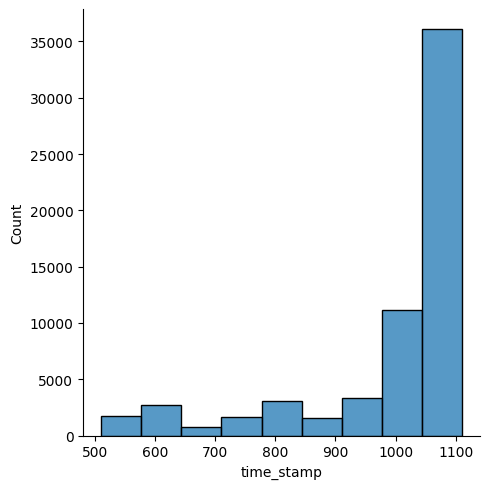

In [16]:
ct_trend = sns.displot(cart['time_stamp'], bins=9) # 6개월간의 '장바구니 담기' 변화

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


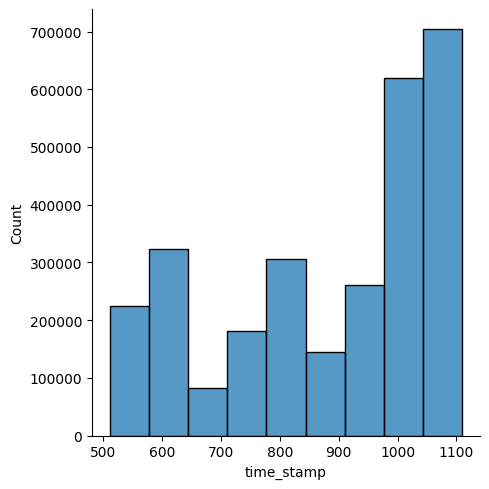

In [17]:
purchase = df_not_black[df_not_black["action_type"]==3]
pc_trend = sns.displot(purchase['time_stamp'], bins=9) # 6개월간의 '구매량' 변화

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


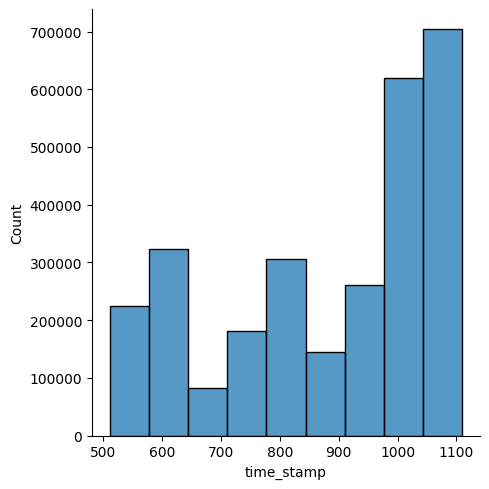

In [18]:
like = df_not_black[df_not_black["action_type"]==3]
lk_trend = sns.displot(like['time_stamp'], bins=9) # 6개월간의 '찜하기' 변화

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


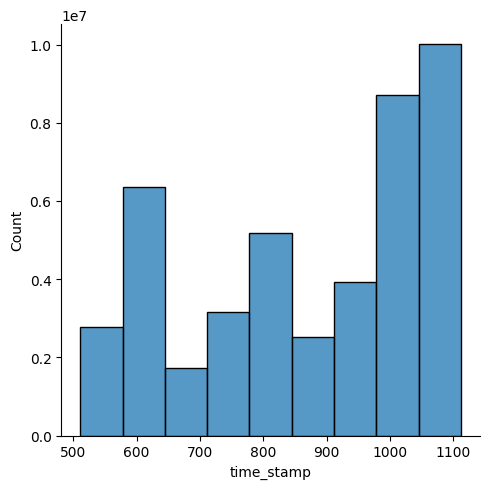

In [19]:
trend = sns.displot(df_not_black['time_stamp'], bins=9) # 6개월간의 '총 행동량' 변화

### 2) Black Friday 시즌 추정

In [20]:
## 이상치 제거
# IQR 구하기
q1=df_not_black['time_stamp'].value_counts().quantile(0.25)
q2=df_not_black['time_stamp'].value_counts().quantile(0.5)
q3=df_not_black['time_stamp'].value_counts().quantile(0.75)
iqr=q3-q1
low_outlier=q1-1.5*iqr
high_outlier= q3+1.5*iqr
print('q1-1.5*iqr: %d' % low_outlier)
print('q3+1.5*iqr: %d' % high_outlier)

q1-1.5*iqr: 49747
q3+1.5*iqr: 350411


In [21]:
df_not_black_count = df_not_black['time_stamp'].value_counts().sort_index()
df_not_black_count=df_not_black_count.to_frame()
df_not_black_count=df_not_black_count.reset_index()

In [22]:
df_not_black_count

,time_stamp,count
0,511,20044
1,512,20704
2,513,23730
3,514,24388
4,515,24113
...,...,...
180,1107,857846
181,1108,968099
182,1109,1207273
183,1110,2940826


In [23]:
df_not_black_count.rename(columns={'time_stamp':'date'}, inplace=True)

블랙프라이데이 세일 시즌이 10/28 ~ 11/11인 것으로 추정된다.

In [24]:
df_not_black_count

,date,count
0,511,20044
1,512,20704
2,513,23730
3,514,24388
4,515,24113
...,...,...
180,1107,857846
181,1108,968099
182,1109,1207273
183,1110,2940826


In [25]:
a_low=df_not_black_count[df_not_black_count['count']<=low_outlier]
a_high=df_not_black_count[df_not_black_count['count']>=high_outlier]
a_low=a_low['date'].to_list()
a_high=a_high['date'].to_list()
a_outlier=a_low+a_high
a_outlier

[511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 1112,
 626,
 909,
 1028,
 1029,
 1030,
 1031,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110]

10월 28일부터 action type count가 급격히 증가하여, 11월 12일에 매우 감소 (평상시보다 count 수가 훨씬 낮다)

In [26]:
df_not_black_count[df_not_black_count['date']==1028]

,date,count
170,1028,368445


In [27]:
df_not_black_count[df_not_black_count['date']==1112]

,date,count
184,1112,46


### 3) Black Friday와 평상시의 action type별 count

평상시 데이터에서 총 30일 랜덤 추출

In [28]:
df_noout_noblack=df_not_black.copy()

In [29]:
df_noout_noblack = df_not_black[~df_not_black['time_stamp'].isin(a_outlier)]
# outlier 제거한 데이터프레임 생성

In [30]:
rand_time = df_noout_noblack['time_stamp'].sample(1).iloc[0] # 특정 날짜 랜덤 추출 (BF 제외)
sample_df = df_noout_noblack[df_noout_noblack['time_stamp']==rand_time] # 특정 날짜의 데이터만 추출
print(rand_time)
print(sample_df['action_type'].value_counts().sort_index())

911
action_type
0    187721
1       165
2     12628
3     13177
Name: count, dtype: int64


In [31]:
# 딕셔너리 생성
action_type_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# 반복 횟수
num_iterations = 30

for i in range(num_iterations):
    # 특정 날짜 랜덤하게 뽑기
    rand_time = df_noout_noblack['time_stamp'].sample(1).iloc[0]

    # 특정 날짜의 데이터만 추출
    sample_df = df_noout_noblack[df_noout_noblack['time_stamp'] == rand_time]

    # 특정 날짜의 action_type 빈도 수 측정
    type_counts = sample_df['action_type'].value_counts().sort_index().to_dict()

    # Update the cumulative counts
    for action_type, count in type_counts.items():
        action_type_counts[action_type] += count

# Calculate and print the average counts
for action_type, cumulative_count in action_type_counts.items():
    avg_count = cumulative_count / num_iterations
    print(f'avg_{action_type}: {avg_count}')

avg_0: 180547.8
avg_1: 127.06666666666666
avg_2: 11009.1
avg_3: 11983.566666666668


Black Friday의 action type별 count plot

In [32]:
# plot을 그리기 위한 데이터프레임 생성 (Black Friday)
df_black2 = df_black['action_type'].value_counts().sort_index().to_frame()
df_black2 = df_black2.rename(columns={'action_type':'count'})
df_black2.insert(loc=0, column='action_type', value=[0, 1, 2, 3])
df_black2

,action_type,count
action_type,,
0,0,9188104
1,1,14725
2,2,1223354
3,3,156450


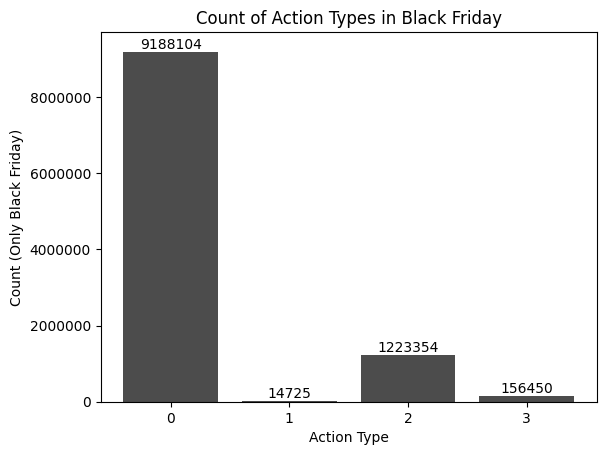

In [33]:
plt.ticklabel_format(style='plain')
bars_bf = plt.bar(df_black2['action_type'], df_black2['count'], color='black', alpha=0.7)
plt.xlabel('Action Type')
plt.ylabel('Count (Only Black Friday)')
plt.title('Count of Action Types in Black Friday')
plt.xticks([0, 1, 2, 3])
plt.ylim([0, 9700000]) 

for bar, count in zip(bars_bf, df_black2['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

평상시의 action type별 count plot

In [34]:
# plot을 그리기 위한 데이터프레임 생성 (평상시)
compare_df = pd.DataFrame(list(action_type_counts.items()), columns=["action_type", "average"])
for i in range(0, 4):
    compare_df['average'][i] = int(compare_df['average'][i]/30)
compare_df

<ipython-input-34-dd36320ce949>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  compare_df['average'][i] = int(compare_df['average'][i]/30)


,action_type,average
0,0,180547
1,1,127
2,2,11009
3,3,11983


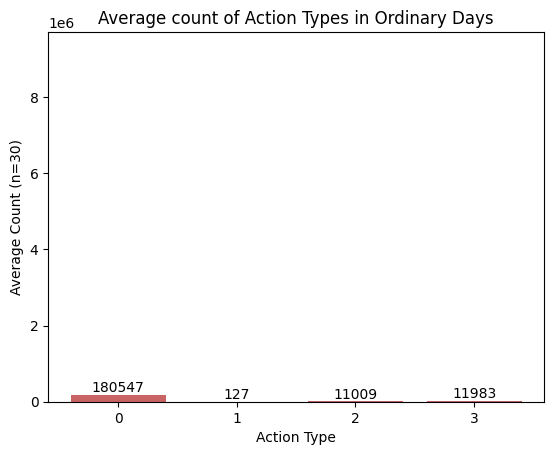

In [35]:
bars_normal = plt.bar(compare_df['action_type'], compare_df['average'], color='firebrick', alpha=0.7)
plt.xlabel('Action Type')
plt.ylabel('Average Count (n=30)')
plt.title('Average count of Action Types in Ordinary Days')
plt.xticks([0, 1, 2, 3])
plt.ylim([0, 9700000]) 

for bar, count in zip(bars_normal, compare_df['average']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

### 4) Black Friday와 평상시의 action type count 변동률

In [36]:
click_rateofchange = ((df_black2['count'][0] - compare_df['average'][0]) / (compare_df['average'][0])) * 100
add_to_cart_rateofchange = ((df_black2['count'][1] - compare_df['average'][1]) / (compare_df['average'][1])) * 100
purchase_rateofchange = ((df_black2['count'][2] - compare_df['average'][2]) / (compare_df['average'][2])) * 100
add_to_favorite_rateofchange = ((df_black2['count'][3] - compare_df['average'][3]) / (compare_df['average'][3])) * 100

print('** rateofchange between Black Friday and ordinary days **')
print('click: %d%%' % click_rateofchange)
print('add-to-cart: %d%%' % add_to_cart_rateofchange)
print('purchase: %d%%' % purchase_rateofchange)
print('add-to-favorite: %d%%' % add_to_favorite_rateofchange)

** rateofchange between Black Friday and ordinary days **
click: 4989%
add-to-cart: 11494%
purchase: 11012%
add-to-favorite: 1205%
